In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart =pd.read_csv("3D Objects/heart.csv")

In [3]:
heart.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0


In [48]:
#changing the variables names to something more relatable
heart.rename(columns={'cp':'chestpain_type','trestbps':'blood pressure','chol':'cholestrol','fbs':'bloodsugar','restecg':'cardiographic_results',
                      'thalach':'maximum_heart_rate','exang':'exercise','oldpeak':'ST_depression','slope':'slope_peak_exercise','ca':'number_major_blood_vessels'},inplace=True)#,
              #])
heart.columns

Index(['age', 'sex', 'chestpain_type', 'blood pressure', 'cholestrol',
       'blood sugar', 'cardiographic_results', 'maximum_heart_rate',
       'exercise', 'ST_depression', 'slope_peak_exercise',
       'number_major_blood_vessels', 'thal', 'target'],
      dtype='object')

In [49]:
heart.head(10)

,age,sex,chestpain_type,blood pressure,cholestrol,blood sugar,cardiographic_results,maximum_heart_rate,exercise,ST_depression,slope_peak_exercise,number_major_blood_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
heart.describe()

,age,sex,chestpain_type,blood pressure,cholestrol,blood sugar,cardiographic_results,maximum_heart_rate,exercise,ST_depression,slope_peak_exercise,number_major_blood_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Description of the data
- the highest age is 77 years while the least is 29 years so the age bracket is 29-77 years
- for the sex 1=male, 0=female and most of the patients are male
- for blood sugar 1=true,0=false
- for exercise induced, 1=yes ,0=no


In [46]:
heart.dtypes

age                             int64
sex                             int64
chestpain_type                  int64
blood pressure                  int64
cholestrol                      int64
blood sugar                     int64
cardiographic_results           int64
maximum_heart_rate              int64
exercise                        int64
ST_depression                 float64
slope_peak_exercise             int64
number_major_blood_vessels      int64
thal                            int64
target                          int64
dtype: object

In [8]:
heart.shape

(303, 14)

In [9]:
#looking for any missing values
heart.isna().sum()

age                           0
sex                           0
chestpain_type                0
blood pressure                0
cholestrol                    0
blood sugar                   0
cardiographic_results         0
maximum_heart_rate            0
exercise                      0
ST_depression                 0
slope_peak_exercise           0
number_major_blood_vessels    0
thal                          0
target                        0
dtype: int64

In [10]:
heart.isnull().any()

age                           False
sex                           False
chestpain_type                False
blood pressure                False
cholestrol                    False
blood sugar                   False
cardiographic_results         False
maximum_heart_rate            False
exercise                      False
ST_depression                 False
slope_peak_exercise           False
number_major_blood_vessels    False
thal                          False
target                        False
dtype: bool

- Seems that there are no missing values in this dataset

In [11]:
#outliers
heart.nunique().sum()

400

In [12]:
heart.nunique()

age                            41
sex                             2
chestpain_type                  4
blood pressure                 49
cholestrol                    152
blood sugar                     2
cardiographic_results           3
maximum_heart_rate             91
exercise                        2
ST_depression                  40
slope_peak_exercise             3
number_major_blood_vessels      5
thal                            4
target                          2
dtype: int64

- these are the present outliers, deal with them later

## Univariate data analysis

In [13]:
import seaborn as sns

In [14]:
# specifically targeting these columns
#blood sugar
#blood pressure 
#age
#ST_depression
#maimum_heart_rate

### Looking at each variable distribution

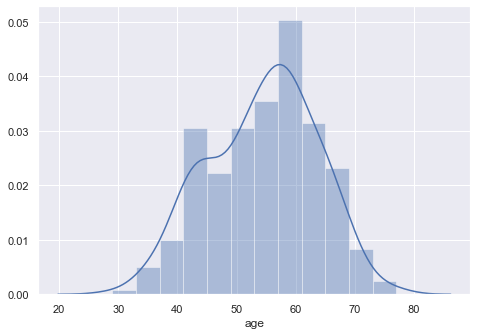

In [24]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("Age")
sns.distplot(heart['age']);


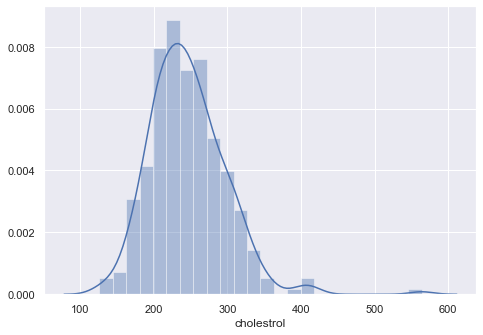

In [25]:
fig= plt.figure()
bx=fig.add_axes([0,0,1,1])
bx.set_xlabel("Cholestrol")
sns.distplot(heart['cholestrol'])
sns.set()

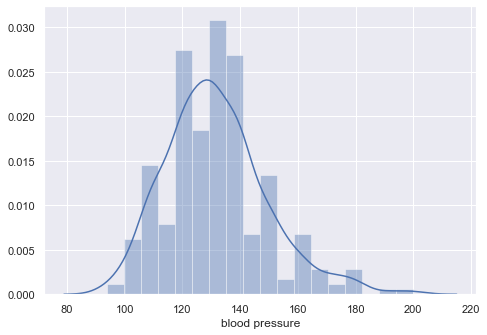

In [26]:
fig=plt.figure()
cx=fig.add_axes([0,0,1,1])
cx.set_xlabel("Blood pressure")
sns.distplot(heart['blood pressure'])
sns.set()

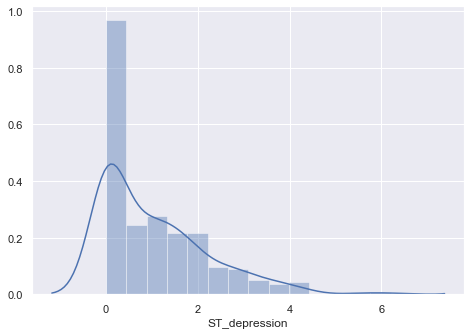

In [28]:
fig=plt.figure()
dx=fig.add_axes([0,0,1,1])
dx.set_xlabel('St depression')
sns.distplot(heart['ST_depression'])
sns.set()

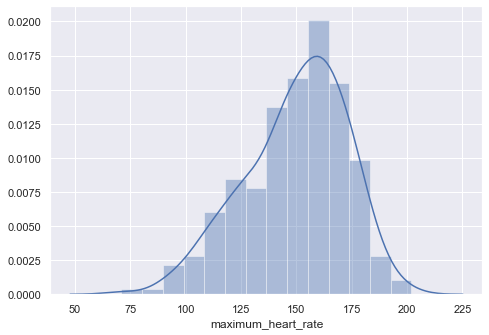

In [29]:
fig=plt.figure()
fx=fig.add_axes([0,0,1,1])
fx.set_xlabel("Heart rate")
sns.distplot(heart['maximum_heart_rate'])
sns.set()

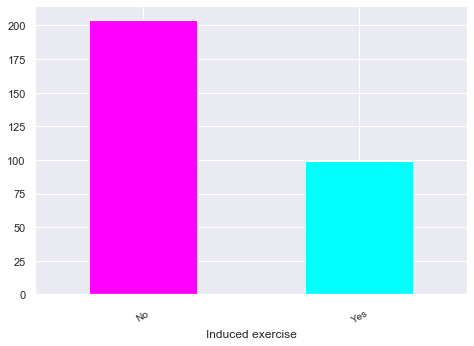

In [38]:
fig=plt.figure()
gx=fig.add_axes([0,0,1,1])
heart.exercise.value_counts().plot(kind = 'bar', rot = 1, color = ['magenta', 'cyan'])
gx.set_xlabel("Induced exercise")
gx.set_xticklabels(['No','Yes'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=30);

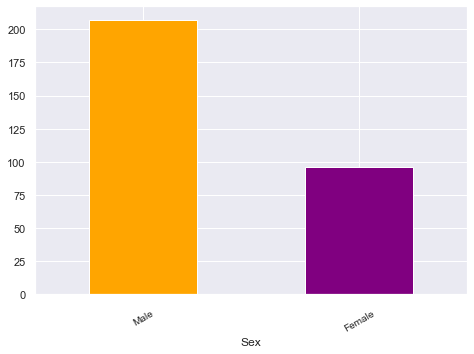

In [40]:
fig=plt.figure()
hx=fig.add_axes([0,0,1,1])
heart.sex.value_counts().plot(kind = 'bar', rot = 1, color = ['orange', 'purple'])
hx.set_xlabel("Sex")
hx.set_xticklabels(['Male','Female'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=30);

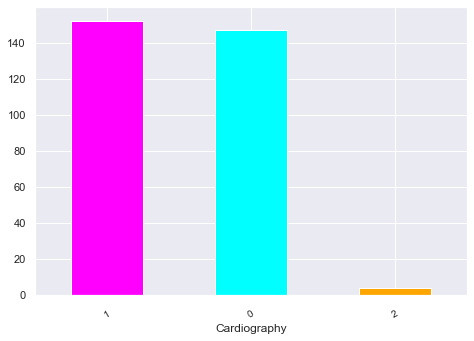

In [62]:
fig=plt.figure()
gx=fig.add_axes([0,0,1,1])
heart.cardiographic_results.value_counts().plot(kind = 'bar', rot = 1, color = ['magenta', 'cyan','orange'])
gx.set_xlabel("Cardiography")
#gx.set_xticklabels(['No','Yes'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=30);

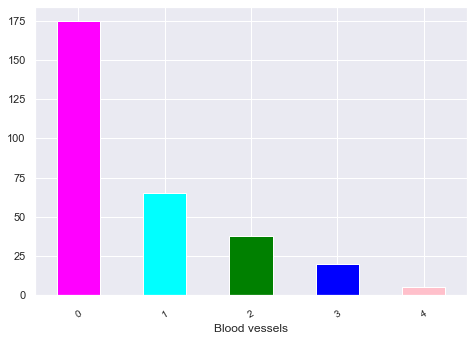

In [64]:
fig=plt.figure()
gx=fig.add_axes([0,0,1,1])
heart.number_major_blood_vessels.value_counts().plot(kind = 'bar', rot = 1, color = ['magenta', 'cyan','green','blue','pink'])
gx.set_xlabel("Blood vessels")
#gx.set_xticklabels(['No','Yes'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=30);

## Let's look at the outliers

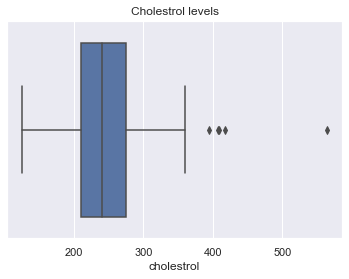

In [65]:
sns.boxplot(heart['cholestrol'])
plt.title("Cholestrol levels");

In [69]:
number=heart.loc[heart.cholestrol==564]
number

,age,sex,chestpain_type,blood pressure,cholestrol,blood sugar,cardiographic_results,maximum_heart_rate,exercise,ST_depression,slope_peak_exercise,number_major_blood_vessels,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


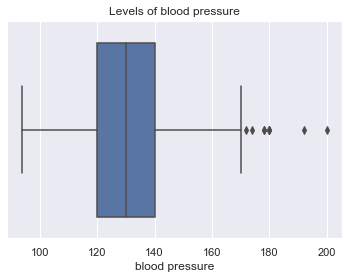

In [71]:
sns.boxplot(heart['blood pressure'])
plt.title("Levels of blood pressure");

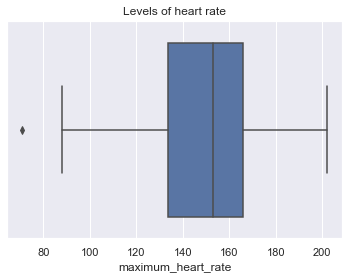

In [72]:
sns.boxplot(heart['maximum_heart_rate'])
plt.title("Levels of heart rate");

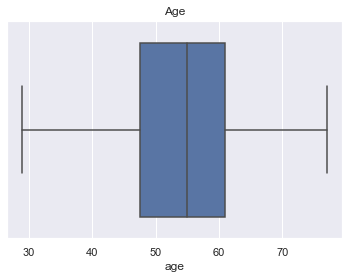

In [73]:
sns.boxplot(heart['age'])
plt.title("Age");

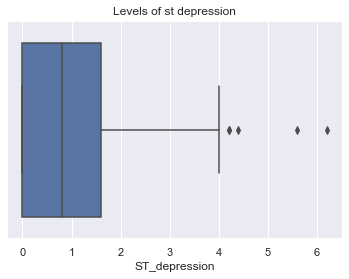

In [75]:
sns.boxplot(heart['ST_depression'])
plt.title("Levels of st depression");

In [78]:
print("median of cholestrol disrtibution ",np.median(heart['cholestrol']))
print("median of blood pressure disrtibution ",np.median(heart['blood pressure']))
print("median of heart rate disrtibution ",np.median(heart['maximum_heart_rate']))

median of cholestrol disrtibution  240.0
median of blood pressure disrtibution  130.0
median of heart rate disrtibution  153.0


In [79]:
print("median of cholestrol disrtibution ",np.quantile(heart['cholestrol'],0.75))
print("median of blood pressure disrtibution ",np.quantile(heart['blood pressure'],0.75))
print("median of heart rate disrtibution ",np.quantile(heart['maximum_heart_rate'],0.75))

median of cholestrol disrtibution  274.5
median of blood pressure disrtibution  140.0
median of heart rate disrtibution  166.0


In [101]:
import scipy.stats as stats
Q1 = heart.quantile(q=.25)
Q3 = heart.quantile(q=.75)
IQR = heart.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
heart_clean = heart[~((heart < (Q1-1.5*IQR)) | (heart > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
heart_clean.shape


(228, 14)

## Bivariate analysis

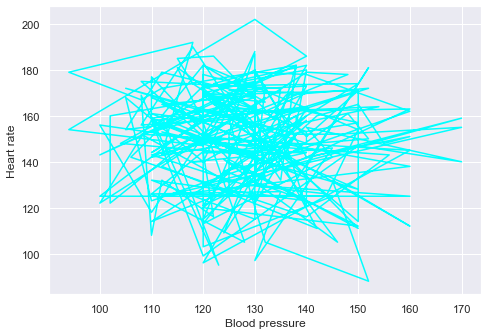

In [102]:
fig=plt.figure()
yx=fig.add_axes([0,0,1,1])
plt.plot(heart_clean['blood pressure'],heart_clean['maximum_heart_rate'], color="cyan")
yx.set_xlabel("Blood pressure")
yx.set_ylabel("Heart rate");

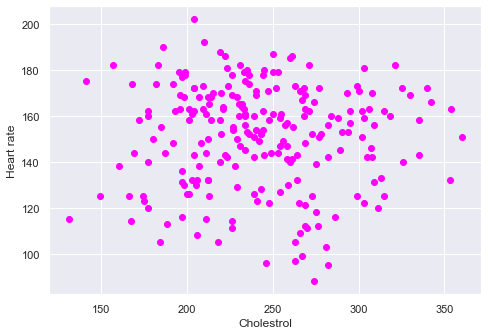

In [103]:
fig=plt.figure()
yx=fig.add_axes([0,0,1,1])
plt.scatter(heart_clean['cholestrol'],heart_clean['maximum_heart_rate'], color="magenta")
yx.set_xlabel("Cholestrol")
yx.set_ylabel("Heart rate");

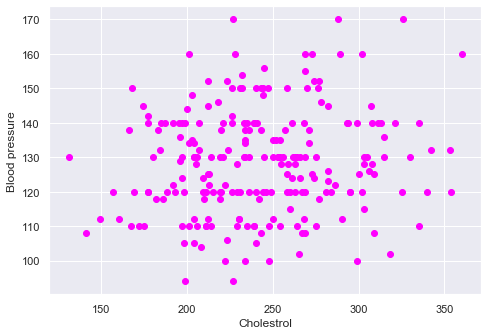

In [104]:
fig=plt.figure()
yx=fig.add_axes([0,0,1,1])
plt.scatter(heart_clean['cholestrol'],heart_clean['blood pressure'], color="magenta")
yx.set_xlabel("Cholestrol")
yx.set_ylabel("Blood pressure");

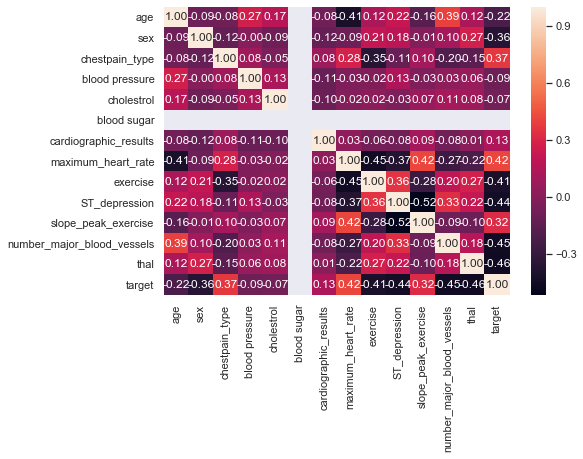

In [105]:
fig=plt.figure()
cx=fig.add_axes([0,0,1,1])
sns.heatmap(heart_clean.corr(),annot=True,fmt='.2f');

## Correlation between variables
- target and chestpain_type
- target and maximum_heart_rate
- target and slope_peak_exercise
- age and number of major blood vessels
- maximum_heart_rate and slope_peak_exercise
- ST_depression and exercise
- chestpain_type and maximum_heart_rate


In [107]:
heart_clean.drop(['blood sugar'],axis=1,inplace=True)
heart_clean.shape

(228, 13)

In [113]:
features=heart_clean[['chestpain_type','maximum_heart_rate','cardiographic_results']]
target=heart_clean['target']

## Select the best features for our model

In [114]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
rfe=RFE(estimator=LinearRegression(),n_features_to_select=5, step=1)
rfe.fit(features,target)

RFE(estimator=LinearRegression(), n_features_to_select=5)

C:\Users\betty123\OneDrive\Documents\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


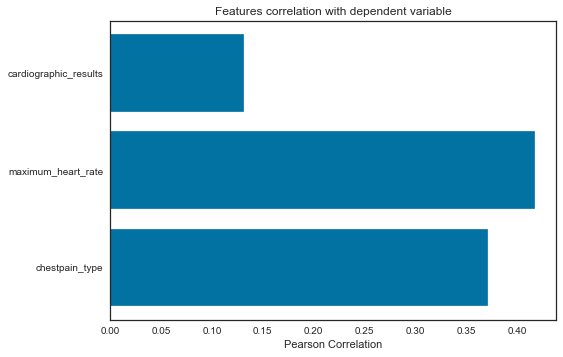

In [205]:
from yellowbrick.target import FeatureCorrelation
feature_names=features.columns
visualize=FeatureCorrelation(labels=feature_names, method='pearson')
visualize.fit(features,target)
visualize.poof()

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
X=features
Y= target

In [188]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.5,
                                               test_size=0.5,
                                               random_state=123,
                                              stratify =Y)

In [189]:
print("Training data: ", train_X.shape)
print("Test data: ", test_X.shape)

Training data:  (114, 3)
Test data:  (114, 3)


In [190]:
classifier=LogisticRegression()

In [191]:
classifier.fit(train_X,train_Y)

LogisticRegression()

In [192]:
prediction=classifier.predict(test_X) 
print("Predicted values:", prediction)

Predicted values: [0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1
 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1
 0 1 1]


In [193]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy Score is {:.5}'.format(accuracy_score(test_Y, prediction)))
print(pd.DataFrame(confusion_matrix(test_Y,prediction)))


Accuracy Score is 0.78947
    0   1
0  33  15
1   9  57


In [194]:
tree_classifier=DecisionTreeClassifier()
tree_classifier.fit(train_X,train_Y)
tree_prediction=classifier.predict(test_X) 
print("Predicted values:", tree_prediction)
print('Accuracy Score is {:.5}'.format(accuracy_score(test_Y, tree_prediction)))
print(pd.DataFrame(confusion_matrix(test_Y,tree_prediction)))

Predicted values: [0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1
 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1
 0 1 1]
Accuracy Score is 0.78947
    0   1
0  33  15
1   9  57


In [195]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier=RandomForestClassifier()
forest_classifier.fit(train_X,train_Y)
forest_prediction=forest_classifier.predict(test_X)
print("Prediction values: ",forest_prediction)
print('Accuracy Score is {:.5}'.format(accuracy_score(test_Y, forest_prediction)))
print(pd.DataFrame(confusion_matrix(test_Y,forest_prediction)))

Prediction values:  [0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 0 1 1]
Accuracy Score is 0.64912
    0   1
0  26  22
1  18  48


In [196]:
from sklearn.neighbors import KNeighborsClassifier
neighbours=KNeighborsClassifier()

In [197]:
neighbours.fit(train_X,train_Y)
neighbors_prediction=neighbours.predict(test_X)
print("Prediction values: ", neighbors_prediction)
print("Acurracy score is {:.5}".format(accuracy_score(test_Y, neighbors_prediction)))
print(pd.DataFrame(confusion_matrix(test_Y, neighbors_prediction)))

Prediction values:  [0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1
 0 1 1]
Acurracy score is 0.65789
    0   1
0  29  19
1  20  46


In [198]:
from sklearn.naive_bayes import GaussianNB
naive =GaussianNB()

In [199]:
naive.fit(train_X, train_Y)
naive_predictions=naive.predict(test_X)
print("Pediction values: ", naive_predictions)
print("Accuracy score is {:.5}".format(accuracy_score(test_Y,naive_predictions)))
print(pd.DataFrame(confusion_matrix(test_Y, naive_predictions)))

Pediction values:  [0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1
 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1
 0 1 1]
Accuracy score is 0.78947
    0   1
0  33  15
1   9  57


## Comparing diffrent model selections

In [179]:
from sklearn import model_selection

LR: 0.692885 (0.055274)
KNN: 0.615020 (0.089806)
CART: 0.667589 (0.102998)
RF: 0.675099 (0.054103)
NG: 0.692885 (0.055274)


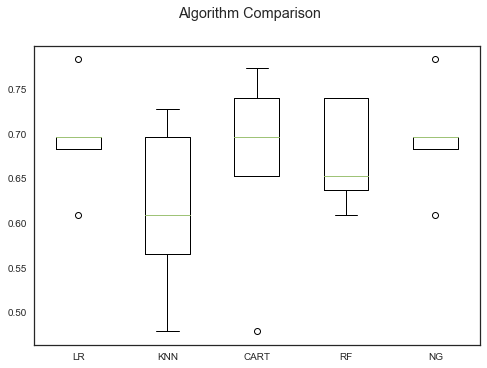

In [200]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NG', GaussianNB()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=5)
  cv_results = model_selection.cross_val_score(model,train_X, train_Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names);


In [215]:
#predict some values
print(classifier.predict([[1,1,600]]))

[1]


In [218]:
print(naive.predict([[2,1,900]]))

[0]


In [223]:
print(neighbours.predict([[1,1,400]]))

[0]


In [225]:
print(forest_classifier.predict([[2,1,500]]))

[0]


In [226]:
print(tree_classifier.predict([[3,1,600]]))

[0]
